In [1]:
%matplotlib inline

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import histlite as hl
import csky as cy
import os

import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/python3/scripts/novae_plots_nb.mplstyle')
#palette = sns.color_palette('Dark2')
palette = sns.color_palette('Paired')

In [4]:
def conv_ref_en(fl, e1, e0, gamma):
    return np.asarray(fl) * (e1/e0)**(2.-gamma)

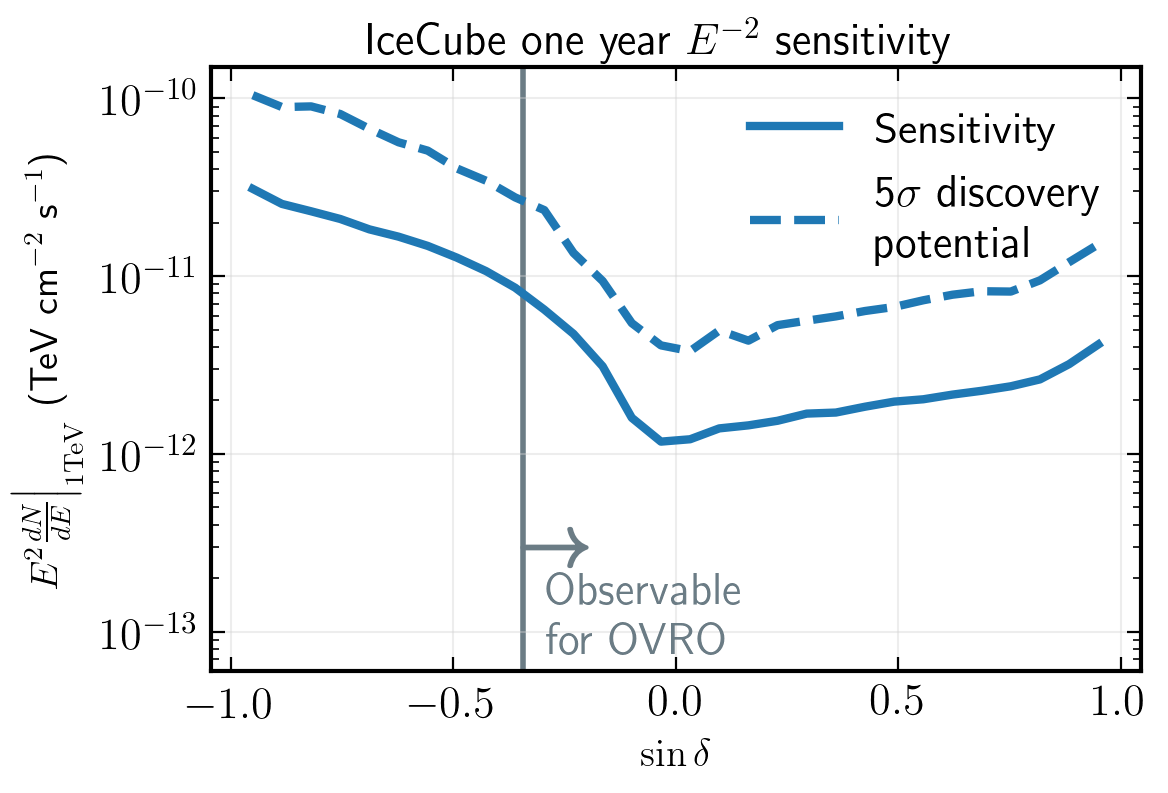

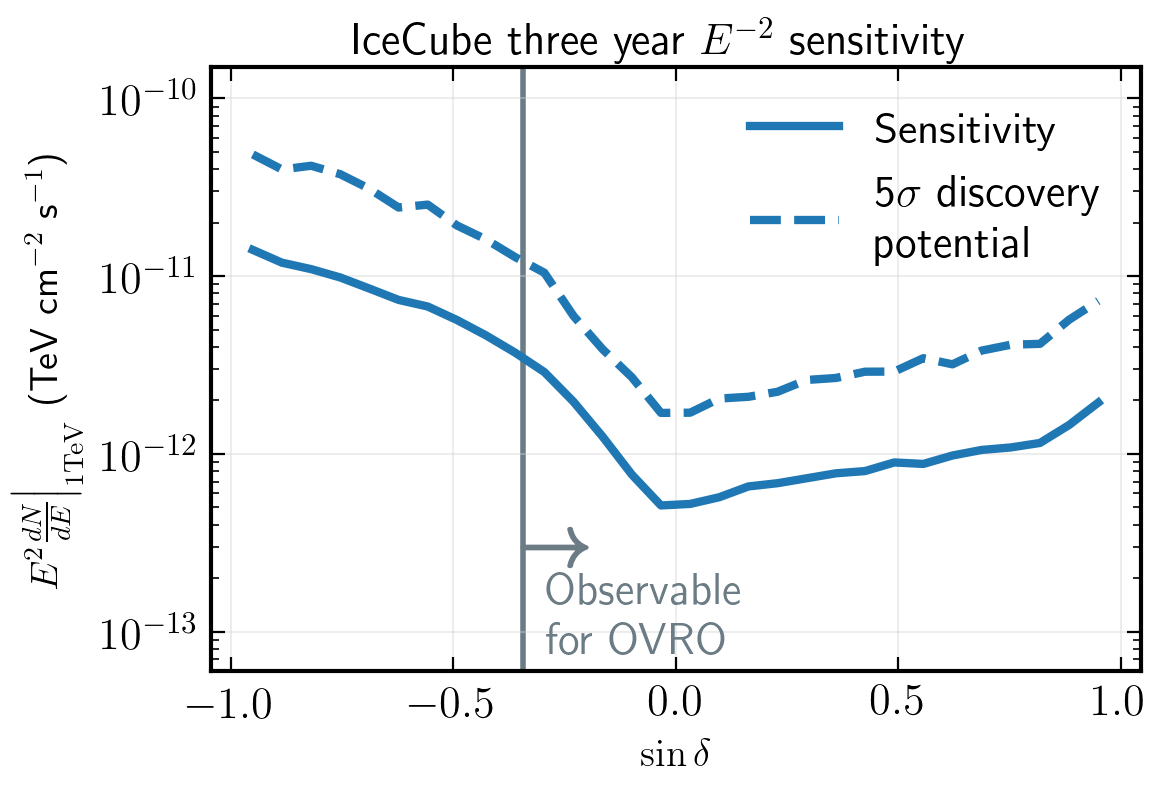

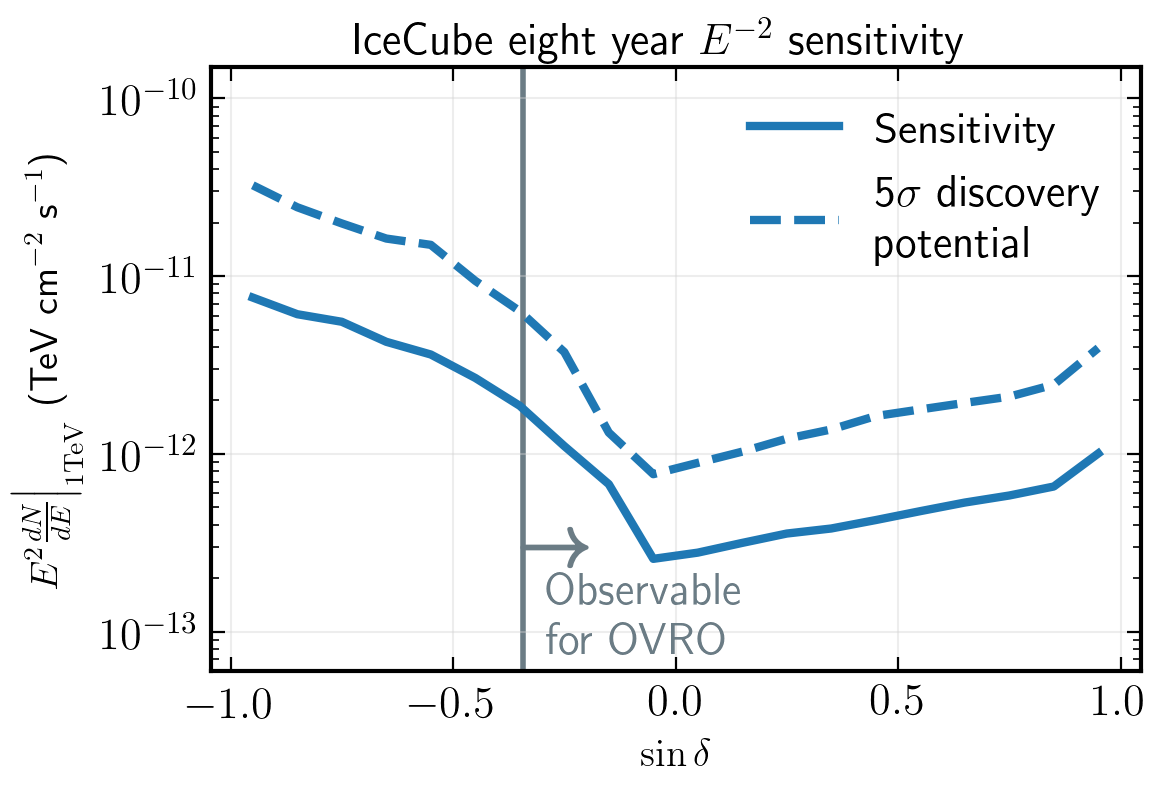

In [44]:
inj_gamma = [2.0]

for dataset_time, title in zip(['one_year', 'three_years', 'eight_years'], 
                               ['one year', 'three year', 'eight year']):
    if dataset_time == 'eight_years':
        with open('./gfu_offline_sens_100tev.pkl', 'rb') as f:
            all_gamma_results = pickle.load(f)
        sinDecs = np.r_[-0.95:0.95:20j]
    else:
        with open('./gfu_offline_sens_100tev_ovro_proposal_{}.pkl'.format(dataset_time), 'rb') as f:
            all_gamma_results = pickle.load(f)
        sinDecs = np.r_[-0.95:0.95:30j]

    fig = plt.figure(dpi=200)
    fig.set_facecolor('w')
    for ii, gamma in enumerate(inj_gamma):
        one_tev_sens = conv_ref_en(all_gamma_results[gamma]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results[gamma]['disc_e2dnde'], 1., 100., gamma)
        plt.plot(all_gamma_results[gamma]['sindec'], one_tev_sens,
                color=palette[2*ii+1], lw=3., ls='-', label='Sensitivity')
        plt.plot(all_gamma_results[gamma]['sindec'], one_tev_disc,
                color=palette[2*ii+1], lw=3., ls='--', label=r'5$\sigma$ discovery' + '\n potential')

    ovro_crit_dec = np.sin(-20.*np.pi/180.)
    plt.axvline(ovro_crit_dec, lw=2., color=sns.xkcd_rgb['battleship grey'], zorder=1)
    # plt.arrow(ovro_crit_dec+0.5, 1e-12, 0.01, 1e-16, 
    #           color=sns.xkcd_rgb['battleship grey'],
    #           head_width=0.0, head_length=0.0)
    plt.text(ovro_crit_dec+0.05, 7.5e-14, 'Observable \n for OVRO', color=sns.xkcd_rgb['battleship grey'])
    plt.plot(ovro_crit_dec+0.065,3e-13, marker=r'$\rightarrow$', 
             markersize=25, color=sns.xkcd_rgb['battleship grey'])

    plt.ylim(6e-14, 1.5e-10)
    plt.legend(loc=1, frameon=False)
    plt.yscale('log')
    #ax0.set_ylim(2e-13, 1e-7)
    plt.ylabel(r'$E^2\frac{dN}{dE}\bigg|_{\mathrm{1 TeV}}$ (TeV cm$^{-2}$ s$^{-1}$)', fontsize=14)
    plt.xlabel(r'$\sin \delta$', fontsize=14)
    fig.suptitle(r"IceCube {} ".format(title) + r"$E^{-2}$ sensitivity", fontsize=16, y=0.94)
    for ftype in ['pdf', 'png']:
        plt.savefig('./dump/GFU_sensitivity_{}_ovro_proposal.{}'.format(dataset_time, ftype),
                   bbox_inches='tight', dpi=200)
    plt.show()